In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime,timezone
from dateutil import tz
import time
import pytz

In [2]:
pip install lxml html5lib beautifulsoup4

Note: you may need to restart the kernel to use updated packages.


In [3]:
dfs=pd.read_html('https://en.wikipedia.org/wiki/List_of_World_Chess_Championships')

In [4]:
dfs[2]

,Year,Host country,Host city,World champion,Runner(s)-up,Won (+),Lost (−),Draw (=),Format
0,1948,Netherlands and Soviet Union,The Hague Moscow,Mikhail Botvinnik,Vasily Smyslov,14 points out of 20,14 points out of 20,14 points out of 20,"5-player, 5-cycle round-robin tournament"
1,1951,Soviet Union,Moscow,Mikhail Botvinnik (2),David Bronstein,5,5,14,best of 24 games[a]
2,1954,Soviet Union,Moscow,Mikhail Botvinnik (3),Vasily Smyslov,7,7,10,best of 24 games[a]
3,1957,Soviet Union,Moscow,Vasily Smyslov,Mikhail Botvinnik,6,3,13,best of 24 games[a]
4,1958,Soviet Union,Moscow,Mikhail Botvinnik (4),Vasily Smyslov,7,5,11,best of 24 games[a]
5,1960,Soviet Union,Moscow,Mikhail Tal,Mikhail Botvinnik,6,2,13,best of 24 games[a]
6,1961,Soviet Union,Moscow,Mikhail Botvinnik (5),Mikhail Tal,10,5,6,best of 24 games[a]
7,1963,Soviet Union,Moscow,Tigran Petrosian,Mikhail Botvinnik,5,2,15,best of 24 games[a]
8,1966,Soviet Union,Moscow,Tigran Petrosian (2),Boris Spassky,4,3,17,best of 24 games[a]
9,1969,Soviet Union,Moscow,Boris Spassky,Tigran Petrosian,6,4,13,best of 24 games[a]


In [5]:
not_unified_df=dfs[3].iloc[0:4]

In [6]:
not_unified_df.columns = ['Hi'] * (len(not_unified_df.columns))

In [7]:
not_unified_df.rename(columns={not_unified_df.columns[1]:'hello'})

,hello,hello,hello,hello,hello,hello,hello,hello,hello
0,1993,United Kingdom,London,Garry Kasparov (5),Nigel Short,6,1,13,best of 24[a]
1,1995,United States,New York City,Garry Kasparov (6),Viswanathan Anand,4,1,13,best of 20[a]
2,2000,United Kingdom,London,Vladimir Kramnik,Garry Kasparov,2,0,13,best of 16[a]
3,2004,Switzerland,Brissago,Vladimir Kramnik (2),Peter Leko,2,2,10,best of 14[a]


In [8]:
not_unified_df.columns=['Year','Host country','Host city','World champion','Runner(s)-up','Won (+)','Lost (−)','Draw (=)','Format']

In [9]:
not_unified_df

,Year,Host country,Host city,World champion,Runner(s)-up,Won (+),Lost (−),Draw (=),Format
0,1993,United Kingdom,London,Garry Kasparov (5),Nigel Short,6,1,13,best of 24[a]
1,1995,United States,New York City,Garry Kasparov (6),Viswanathan Anand,4,1,13,best of 20[a]
2,2000,United Kingdom,London,Vladimir Kramnik,Garry Kasparov,2,0,13,best of 16[a]
3,2004,Switzerland,Brissago,Vladimir Kramnik (2),Peter Leko,2,2,10,best of 14[a]


In [10]:
new_df=pd.concat([dfs[2],not_unified_df,dfs[4]])

In [11]:
new_df=new_df.reset_index()

In [12]:
new_df

,index,Year,Host country,Host city,World champion,Runner(s)-up,Won (+),Lost (−),Draw (=),Format
0,0,1948,Netherlands and Soviet Union,The Hague Moscow,Mikhail Botvinnik,Vasily Smyslov,14 points out of 20,14 points out of 20,14 points out of 20,"5-player, 5-cycle round-robin tournament"
1,1,1951,Soviet Union,Moscow,Mikhail Botvinnik (2),David Bronstein,5,5,14,best of 24 games[a]
2,2,1954,Soviet Union,Moscow,Mikhail Botvinnik (3),Vasily Smyslov,7,7,10,best of 24 games[a]
3,3,1957,Soviet Union,Moscow,Vasily Smyslov,Mikhail Botvinnik,6,3,13,best of 24 games[a]
4,4,1958,Soviet Union,Moscow,Mikhail Botvinnik (4),Vasily Smyslov,7,5,11,best of 24 games[a]
5,5,1960,Soviet Union,Moscow,Mikhail Tal,Mikhail Botvinnik,6,2,13,best of 24 games[a]
6,6,1961,Soviet Union,Moscow,Mikhail Botvinnik (5),Mikhail Tal,10,5,6,best of 24 games[a]
7,7,1963,Soviet Union,Moscow,Tigran Petrosian,Mikhail Botvinnik,5,2,15,best of 24 games[a]
8,8,1966,Soviet Union,Moscow,Tigran Petrosian (2),Boris Spassky,4,3,17,best of 24 games[a]
9,9,1969,Soviet Union,Moscow,Boris Spassky,Tigran Petrosian,6,4,13,best of 24 games[a]


In [13]:
new_df=new_df.drop('index',axis=1)

In [14]:
new_df

,Year,Host country,Host city,World champion,Runner(s)-up,Won (+),Lost (−),Draw (=),Format
0,1948,Netherlands and Soviet Union,The Hague Moscow,Mikhail Botvinnik,Vasily Smyslov,14 points out of 20,14 points out of 20,14 points out of 20,"5-player, 5-cycle round-robin tournament"
1,1951,Soviet Union,Moscow,Mikhail Botvinnik (2),David Bronstein,5,5,14,best of 24 games[a]
2,1954,Soviet Union,Moscow,Mikhail Botvinnik (3),Vasily Smyslov,7,7,10,best of 24 games[a]
3,1957,Soviet Union,Moscow,Vasily Smyslov,Mikhail Botvinnik,6,3,13,best of 24 games[a]
4,1958,Soviet Union,Moscow,Mikhail Botvinnik (4),Vasily Smyslov,7,5,11,best of 24 games[a]
5,1960,Soviet Union,Moscow,Mikhail Tal,Mikhail Botvinnik,6,2,13,best of 24 games[a]
6,1961,Soviet Union,Moscow,Mikhail Botvinnik (5),Mikhail Tal,10,5,6,best of 24 games[a]
7,1963,Soviet Union,Moscow,Tigran Petrosian,Mikhail Botvinnik,5,2,15,best of 24 games[a]
8,1966,Soviet Union,Moscow,Tigran Petrosian (2),Boris Spassky,4,3,17,best of 24 games[a]
9,1969,Soviet Union,Moscow,Boris Spassky,Tigran Petrosian,6,4,13,best of 24 games[a]


In [15]:
new_df=new_df.drop(34)

In [16]:
new_df=new_df.rename(columns={'World champion':'Defending Champion','Runner(s)-up':'Challenger'})

In [17]:
new_df=new_df.drop(0)

In [18]:
new_df

,Year,Host country,Host city,Defending Champion,Challenger,Won (+),Lost (−),Draw (=),Format
1,1951,Soviet Union,Moscow,Mikhail Botvinnik (2),David Bronstein,5,5,14,best of 24 games[a]
2,1954,Soviet Union,Moscow,Mikhail Botvinnik (3),Vasily Smyslov,7,7,10,best of 24 games[a]
3,1957,Soviet Union,Moscow,Vasily Smyslov,Mikhail Botvinnik,6,3,13,best of 24 games[a]
4,1958,Soviet Union,Moscow,Mikhail Botvinnik (4),Vasily Smyslov,7,5,11,best of 24 games[a]
5,1960,Soviet Union,Moscow,Mikhail Tal,Mikhail Botvinnik,6,2,13,best of 24 games[a]
6,1961,Soviet Union,Moscow,Mikhail Botvinnik (5),Mikhail Tal,10,5,6,best of 24 games[a]
7,1963,Soviet Union,Moscow,Tigran Petrosian,Mikhail Botvinnik,5,2,15,best of 24 games[a]
8,1966,Soviet Union,Moscow,Tigran Petrosian (2),Boris Spassky,4,3,17,best of 24 games[a]
9,1969,Soviet Union,Moscow,Boris Spassky,Tigran Petrosian,6,4,13,best of 24 games[a]
10,1972,Iceland,Reykjavík,Bobby Fischer,Boris Spassky,7,3,11,best of 24 games[a]


In [19]:
new_df=new_df.reset_index()

In [20]:
new_df=new_df.drop('index',axis=1)

In [21]:
new_df

,Year,Host country,Host city,Defending Champion,Challenger,Won (+),Lost (−),Draw (=),Format
0,1951,Soviet Union,Moscow,Mikhail Botvinnik (2),David Bronstein,5,5,14,best of 24 games[a]
1,1954,Soviet Union,Moscow,Mikhail Botvinnik (3),Vasily Smyslov,7,7,10,best of 24 games[a]
2,1957,Soviet Union,Moscow,Vasily Smyslov,Mikhail Botvinnik,6,3,13,best of 24 games[a]
3,1958,Soviet Union,Moscow,Mikhail Botvinnik (4),Vasily Smyslov,7,5,11,best of 24 games[a]
4,1960,Soviet Union,Moscow,Mikhail Tal,Mikhail Botvinnik,6,2,13,best of 24 games[a]
5,1961,Soviet Union,Moscow,Mikhail Botvinnik (5),Mikhail Tal,10,5,6,best of 24 games[a]
6,1963,Soviet Union,Moscow,Tigran Petrosian,Mikhail Botvinnik,5,2,15,best of 24 games[a]
7,1966,Soviet Union,Moscow,Tigran Petrosian (2),Boris Spassky,4,3,17,best of 24 games[a]
8,1969,Soviet Union,Moscow,Boris Spassky,Tigran Petrosian,6,4,13,best of 24 games[a]
9,1972,Iceland,Reykjavík,Bobby Fischer,Boris Spassky,7,3,11,best of 24 games[a]


In [22]:
new_df.iloc[2]['Defending Champion']='Mikhail Botvinnik'

In [23]:
new_df.iloc[2]['Challenger']='Vasily Smyslov'

In [24]:
new_df.iloc[3]['Defending Champion']='Vasily Smyslov'

In [25]:
new_df.iloc[3]['Challenger']='Mikhail Botvinnik'

In [26]:
new_df.iloc[0]['Defending Champion']="Mikhail Botvinnik"
new_df.iloc[1]['Defending Champion']="Mikhail Botvinnik"
new_df.iloc[4]['Defending Champion']="Mikhail Botvinnik"
new_df.iloc[4]['Challenger']="Mikhail Tal"
new_df.iloc[5]['Defending Champion']="Mikhail Tal"
new_df.iloc[5]['Challenger']="Mikhail Botvinnik"
new_df.iloc[6]['Defending Champion']="Mikhail Botvinnik"
new_df.iloc[6]['Challenger']="Tigran Petrosian"
new_df.iloc[7]['Defending Champion']="Tigran Petrosian"
new_df.iloc[7]['Challenger']="Boris Spassky"
new_df.iloc[8]['Defending Champion']="Tigran Petrosian"
new_df.iloc[8]['Challenger']="Boris Spassky"
new_df.iloc[9]['Defending Champion']="Boris Spassky"
new_df.iloc[9]['Challenger']="Bobby Fischer"


In [27]:
new_df.iloc[11]['Defending Champion']="Anatoly Karpov"
new_df.iloc[11]['Challenger']="Viktor Korchnoi"
new_df.iloc[12]['Defending Champion']="Anatoly Karpov"
new_df.iloc[12]['Challenger']="Viktor Korchnoi"
new_df.iloc[14]['Defending Champion']="Anatoly Karpov"
new_df.iloc[14]['Challenger']="Gary Kasparov"
new_df.iloc[15]['Defending Champion']="Garry Kasparov"
new_df.iloc[15]['Challenger']="Anatoly Karpov"
new_df.iloc[16]['Defending Champion']="Garry Kasparov"
new_df.iloc[16]['Challenger']="Anatoly Karpov"
new_df.iloc[17]['Defending Champion']="Garry Kasparov"
new_df.iloc[17]['Challenger']="Anatoly Karpov"
new_df.iloc[18]['Defending Champion']="Garry Kasparov"
new_df.iloc[18]['Challenger']="Nigel Short"
new_df.iloc[19]['Defending Champion']="Garry Kasparov"
new_df.iloc[19]['Challenger']="Viswanathan Anand"
new_df.iloc[20]['Defending Champion']="Garry Kasparov"
new_df.iloc[20]['Challenger']="Vladimar Kramnik"
new_df.iloc[21]['Defending Champion']="Vladimar Kramnik"
new_df.iloc[21]['Challenger']="Peter Leko"
new_df.iloc[22]['Defending Champion']="Vladimar Kramnik"
new_df.iloc[22]['Challenger']="Veselin Topalov"
new_df.iloc[24]['Defending Champion']="Viswanathan Anand"
new_df.iloc[24]['Challenger']="Vladimar Kramnik"
new_df.iloc[25]['Defending Champion']="Viswanathan Anand"
new_df.iloc[25]['Challenger']="Veselin Topalov"
new_df.iloc[26]['Defending Champion']="Viswanathan Anand"
new_df.iloc[26]['Challenger']="Boris Gelfand"
new_df.iloc[27]['Defending Champion']="Viswanathan Anand"
new_df.iloc[27]['Challenger']="Magnus Carlsen"
new_df.iloc[28]['Defending Champion']="Magnus Carlsen"
new_df.iloc[28]['Challenger']="Viswanathan Anand"
new_df.iloc[29]['Defending Champion']="Magnus Carlsen"
new_df.iloc[29]['Challenger']="Sergey Karjakin"
new_df.iloc[30]['Defending Champion']="Magnus Carlsen"
new_df.iloc[30]['Challenger']="Fabiano Caruana"
new_df.iloc[31]['Defending Champion']="Magnus Carlsen"
new_df.iloc[31]['Challenger']="Ian Nepomniachtchi"





In [28]:
new_df=new_df.drop(10)

In [29]:
new_df=new_df.drop(13)

In [30]:
new_df=new_df.drop(23)


In [31]:
new_df=new_df.drop(32)

In [32]:
new_df=new_df.reset_index()

In [33]:
new_df=new_df.drop('index',axis=1)

In [34]:
new_df

,Year,Host country,Host city,Defending Champion,Challenger,Won (+),Lost (−),Draw (=),Format
0,1951,Soviet Union,Moscow,Mikhail Botvinnik,David Bronstein,5,5,14,best of 24 games[a]
1,1954,Soviet Union,Moscow,Mikhail Botvinnik,Vasily Smyslov,7,7,10,best of 24 games[a]
2,1957,Soviet Union,Moscow,Mikhail Botvinnik,Vasily Smyslov,6,3,13,best of 24 games[a]
3,1958,Soviet Union,Moscow,Vasily Smyslov,Mikhail Botvinnik,7,5,11,best of 24 games[a]
4,1960,Soviet Union,Moscow,Mikhail Botvinnik,Mikhail Tal,6,2,13,best of 24 games[a]
5,1961,Soviet Union,Moscow,Mikhail Tal,Mikhail Botvinnik,10,5,6,best of 24 games[a]
6,1963,Soviet Union,Moscow,Mikhail Botvinnik,Tigran Petrosian,5,2,15,best of 24 games[a]
7,1966,Soviet Union,Moscow,Tigran Petrosian,Boris Spassky,4,3,17,best of 24 games[a]
8,1969,Soviet Union,Moscow,Tigran Petrosian,Boris Spassky,6,4,13,best of 24 games[a]
9,1972,Iceland,Reykjavík,Boris Spassky,Bobby Fischer,7,3,11,best of 24 games[a]


In [35]:
new_df=new_df.set_index('Year')

In [36]:
new_df

,Host country,Host city,Defending Champion,Challenger,Won (+),Lost (−),Draw (=),Format
Year,,,,,,,,
1951,Soviet Union,Moscow,Mikhail Botvinnik,David Bronstein,5,5,14,best of 24 games[a]
1954,Soviet Union,Moscow,Mikhail Botvinnik,Vasily Smyslov,7,7,10,best of 24 games[a]
1957,Soviet Union,Moscow,Mikhail Botvinnik,Vasily Smyslov,6,3,13,best of 24 games[a]
1958,Soviet Union,Moscow,Vasily Smyslov,Mikhail Botvinnik,7,5,11,best of 24 games[a]
1960,Soviet Union,Moscow,Mikhail Botvinnik,Mikhail Tal,6,2,13,best of 24 games[a]
1961,Soviet Union,Moscow,Mikhail Tal,Mikhail Botvinnik,10,5,6,best of 24 games[a]
1963,Soviet Union,Moscow,Mikhail Botvinnik,Tigran Petrosian,5,2,15,best of 24 games[a]
1966,Soviet Union,Moscow,Tigran Petrosian,Boris Spassky,4,3,17,best of 24 games[a]
1969,Soviet Union,Moscow,Tigran Petrosian,Boris Spassky,6,4,13,best of 24 games[a]


In [37]:
new_df['Result']=[1,1,0,0,0,0,0,1,0,0,1,1,0,1,1,1,1,1,0,1,1,1,1,1,0,1,1,1,1]

In [38]:
new_df

,Host country,Host city,Defending Champion,Challenger,Won (+),Lost (−),Draw (=),Format,Result
Year,,,,,,,,,
1951,Soviet Union,Moscow,Mikhail Botvinnik,David Bronstein,5,5,14,best of 24 games[a],1
1954,Soviet Union,Moscow,Mikhail Botvinnik,Vasily Smyslov,7,7,10,best of 24 games[a],1
1957,Soviet Union,Moscow,Mikhail Botvinnik,Vasily Smyslov,6,3,13,best of 24 games[a],0
1958,Soviet Union,Moscow,Vasily Smyslov,Mikhail Botvinnik,7,5,11,best of 24 games[a],0
1960,Soviet Union,Moscow,Mikhail Botvinnik,Mikhail Tal,6,2,13,best of 24 games[a],0
1961,Soviet Union,Moscow,Mikhail Tal,Mikhail Botvinnik,10,5,6,best of 24 games[a],0
1963,Soviet Union,Moscow,Mikhail Botvinnik,Tigran Petrosian,5,2,15,best of 24 games[a],0
1966,Soviet Union,Moscow,Tigran Petrosian,Boris Spassky,4,3,17,best of 24 games[a],1
1969,Soviet Union,Moscow,Tigran Petrosian,Boris Spassky,6,4,13,best of 24 games[a],0


In [39]:
new_df['Defending Champion Age']=[39,42,45,37,48,24,51,36,39,35,27,30,34,23,24,27,30,32,37,29,31,38,40,42,43,23,25,27,31]

In [40]:
new_df

,Host country,Host city,Defending Champion,Challenger,Won (+),Lost (−),Draw (=),Format,Result,Defending Champion Age
Year,,,,,,,,,,
1951,Soviet Union,Moscow,Mikhail Botvinnik,David Bronstein,5,5,14,best of 24 games[a],1,39
1954,Soviet Union,Moscow,Mikhail Botvinnik,Vasily Smyslov,7,7,10,best of 24 games[a],1,42
1957,Soviet Union,Moscow,Mikhail Botvinnik,Vasily Smyslov,6,3,13,best of 24 games[a],0,45
1958,Soviet Union,Moscow,Vasily Smyslov,Mikhail Botvinnik,7,5,11,best of 24 games[a],0,37
1960,Soviet Union,Moscow,Mikhail Botvinnik,Mikhail Tal,6,2,13,best of 24 games[a],0,48
1961,Soviet Union,Moscow,Mikhail Tal,Mikhail Botvinnik,10,5,6,best of 24 games[a],0,24
1963,Soviet Union,Moscow,Mikhail Botvinnik,Tigran Petrosian,5,2,15,best of 24 games[a],0,51
1966,Soviet Union,Moscow,Tigran Petrosian,Boris Spassky,4,3,17,best of 24 games[a],1,36
1969,Soviet Union,Moscow,Tigran Petrosian,Boris Spassky,6,4,13,best of 24 games[a],0,39


In [41]:
new_df['Challenger Age']=[27,33,36,46,23,49,33,29,32,29,47,50,22,35,36,39,28,25,25,25,31,33,35,43,22,44,26,26,31]

In [42]:
new_df

,Host country,Host city,Defending Champion,Challenger,Won (+),Lost (−),Draw (=),Format,Result,Defending Champion Age,Challenger Age
Year,,,,,,,,,,,
1951,Soviet Union,Moscow,Mikhail Botvinnik,David Bronstein,5,5,14,best of 24 games[a],1,39,27
1954,Soviet Union,Moscow,Mikhail Botvinnik,Vasily Smyslov,7,7,10,best of 24 games[a],1,42,33
1957,Soviet Union,Moscow,Mikhail Botvinnik,Vasily Smyslov,6,3,13,best of 24 games[a],0,45,36
1958,Soviet Union,Moscow,Vasily Smyslov,Mikhail Botvinnik,7,5,11,best of 24 games[a],0,37,46
1960,Soviet Union,Moscow,Mikhail Botvinnik,Mikhail Tal,6,2,13,best of 24 games[a],0,48,23
1961,Soviet Union,Moscow,Mikhail Tal,Mikhail Botvinnik,10,5,6,best of 24 games[a],0,24,49
1963,Soviet Union,Moscow,Mikhail Botvinnik,Tigran Petrosian,5,2,15,best of 24 games[a],0,51,33
1966,Soviet Union,Moscow,Tigran Petrosian,Boris Spassky,4,3,17,best of 24 games[a],1,36,29
1969,Soviet Union,Moscow,Tigran Petrosian,Boris Spassky,6,4,13,best of 24 games[a],0,39,32


In [43]:
new_df['Rating of Defending Champion']=[2743,2779,2762,2780,2736,2796,2756,2736,2650,2660,2725,2700,2720,2740,2740,2800,2815,2805,2849,2770,2743,2783,2787,2791,2775,2863,2853,2835,2856]

In [44]:
new_df

,Host country,Host city,Defending Champion,Challenger,Won (+),Lost (−),Draw (=),Format,Result,Defending Champion Age,Challenger Age,Rating of Defending Champion
Year,,,,,,,,,,,,
1951,Soviet Union,Moscow,Mikhail Botvinnik,David Bronstein,5,5,14,best of 24 games[a],1,39,27,2743
1954,Soviet Union,Moscow,Mikhail Botvinnik,Vasily Smyslov,7,7,10,best of 24 games[a],1,42,33,2779
1957,Soviet Union,Moscow,Mikhail Botvinnik,Vasily Smyslov,6,3,13,best of 24 games[a],0,45,36,2762
1958,Soviet Union,Moscow,Vasily Smyslov,Mikhail Botvinnik,7,5,11,best of 24 games[a],0,37,46,2780
1960,Soviet Union,Moscow,Mikhail Botvinnik,Mikhail Tal,6,2,13,best of 24 games[a],0,48,23,2736
1961,Soviet Union,Moscow,Mikhail Tal,Mikhail Botvinnik,10,5,6,best of 24 games[a],0,24,49,2796
1963,Soviet Union,Moscow,Mikhail Botvinnik,Tigran Petrosian,5,2,15,best of 24 games[a],0,51,33,2756
1966,Soviet Union,Moscow,Tigran Petrosian,Boris Spassky,4,3,17,best of 24 games[a],1,36,29,2736
1969,Soviet Union,Moscow,Tigran Petrosian,Boris Spassky,6,4,13,best of 24 games[a],0,39,32,2650


In [45]:
new_df['Rating of Challenger']=[2780,2790,2782,2747,2789,2729,2790,2767,2690,2785,2665,2695,2700,2705,2700,2730,2685,2715,2772,2741,2813,2772,2805,2727,2870,2792,2772,2832,2782]

In [46]:
new_df

,Host country,Host city,Defending Champion,Challenger,Won (+),Lost (−),Draw (=),Format,Result,Defending Champion Age,Challenger Age,Rating of Defending Champion,Rating of Challenger
Year,,,,,,,,,,,,,
1951,Soviet Union,Moscow,Mikhail Botvinnik,David Bronstein,5,5,14,best of 24 games[a],1,39,27,2743,2780
1954,Soviet Union,Moscow,Mikhail Botvinnik,Vasily Smyslov,7,7,10,best of 24 games[a],1,42,33,2779,2790
1957,Soviet Union,Moscow,Mikhail Botvinnik,Vasily Smyslov,6,3,13,best of 24 games[a],0,45,36,2762,2782
1958,Soviet Union,Moscow,Vasily Smyslov,Mikhail Botvinnik,7,5,11,best of 24 games[a],0,37,46,2780,2747
1960,Soviet Union,Moscow,Mikhail Botvinnik,Mikhail Tal,6,2,13,best of 24 games[a],0,48,23,2736,2789
1961,Soviet Union,Moscow,Mikhail Tal,Mikhail Botvinnik,10,5,6,best of 24 games[a],0,24,49,2796,2729
1963,Soviet Union,Moscow,Mikhail Botvinnik,Tigran Petrosian,5,2,15,best of 24 games[a],0,51,33,2756,2790
1966,Soviet Union,Moscow,Tigran Petrosian,Boris Spassky,4,3,17,best of 24 games[a],1,36,29,2736,2767
1969,Soviet Union,Moscow,Tigran Petrosian,Boris Spassky,6,4,13,best of 24 games[a],0,39,32,2650,2690


In [47]:
new_df['Rating Difference']=new_df['Rating of Defending Champion']-new_df['Rating of Challenger']

In [48]:
new_df['Age Difference']=new_df['Defending Champion Age']-new_df['Challenger Age']

In [49]:
new_df=new_df.loc[:,['Host country','Host city','Defending Champion','Challenger','Won (+)','Lost (−)','Draw (=)','Format','Defending Champion Age',
             "Challenger Age",'Age Difference','Rating of Defending Champion','Rating of Challenger','Rating Difference',"Result"]]

In [50]:
new_df['World Ranking Difference']=[-6,-2,-3,4,-5,6,-6,-6,-3,-1,1,1,1,1,1,1,9,3,2,2,-3,1,-2,16,-7,5,8,1,4]

In [51]:
new_df

,Host country,Host city,Defending Champion,Challenger,Won (+),Lost (−),Draw (=),Format,Defending Champion Age,Challenger Age,Age Difference,Rating of Defending Champion,Rating of Challenger,Rating Difference,Result,World Ranking Difference
Year,,,,,,,,,,,,,,,,
1951,Soviet Union,Moscow,Mikhail Botvinnik,David Bronstein,5,5,14,best of 24 games[a],39,27,12,2743,2780,-37,1,-6
1954,Soviet Union,Moscow,Mikhail Botvinnik,Vasily Smyslov,7,7,10,best of 24 games[a],42,33,9,2779,2790,-11,1,-2
1957,Soviet Union,Moscow,Mikhail Botvinnik,Vasily Smyslov,6,3,13,best of 24 games[a],45,36,9,2762,2782,-20,0,-3
1958,Soviet Union,Moscow,Vasily Smyslov,Mikhail Botvinnik,7,5,11,best of 24 games[a],37,46,-9,2780,2747,33,0,4
1960,Soviet Union,Moscow,Mikhail Botvinnik,Mikhail Tal,6,2,13,best of 24 games[a],48,23,25,2736,2789,-53,0,-5
1961,Soviet Union,Moscow,Mikhail Tal,Mikhail Botvinnik,10,5,6,best of 24 games[a],24,49,-25,2796,2729,67,0,6
1963,Soviet Union,Moscow,Mikhail Botvinnik,Tigran Petrosian,5,2,15,best of 24 games[a],51,33,18,2756,2790,-34,0,-6
1966,Soviet Union,Moscow,Tigran Petrosian,Boris Spassky,4,3,17,best of 24 games[a],36,29,7,2736,2767,-31,1,-6
1969,Soviet Union,Moscow,Tigran Petrosian,Boris Spassky,6,4,13,best of 24 games[a],39,32,7,2650,2690,-40,0,-3


In [52]:
new_df['Head to Head']=[-1,6,5,2,0,4,0,1,1,3,0,1,3,-1,0,1,9,3,-1,1,5,-2,4,1,3,0,3,5,-3]

In [53]:
new_df

,Host country,Host city,Defending Champion,Challenger,Won (+),Lost (−),Draw (=),Format,Defending Champion Age,Challenger Age,Age Difference,Rating of Defending Champion,Rating of Challenger,Rating Difference,Result,World Ranking Difference,Head to Head
Year,,,,,,,,,,,,,,,,,
1951,Soviet Union,Moscow,Mikhail Botvinnik,David Bronstein,5,5,14,best of 24 games[a],39,27,12,2743,2780,-37,1,-6,-1
1954,Soviet Union,Moscow,Mikhail Botvinnik,Vasily Smyslov,7,7,10,best of 24 games[a],42,33,9,2779,2790,-11,1,-2,6
1957,Soviet Union,Moscow,Mikhail Botvinnik,Vasily Smyslov,6,3,13,best of 24 games[a],45,36,9,2762,2782,-20,0,-3,5
1958,Soviet Union,Moscow,Vasily Smyslov,Mikhail Botvinnik,7,5,11,best of 24 games[a],37,46,-9,2780,2747,33,0,4,2
1960,Soviet Union,Moscow,Mikhail Botvinnik,Mikhail Tal,6,2,13,best of 24 games[a],48,23,25,2736,2789,-53,0,-5,0
1961,Soviet Union,Moscow,Mikhail Tal,Mikhail Botvinnik,10,5,6,best of 24 games[a],24,49,-25,2796,2729,67,0,6,4
1963,Soviet Union,Moscow,Mikhail Botvinnik,Tigran Petrosian,5,2,15,best of 24 games[a],51,33,18,2756,2790,-34,0,-6,0
1966,Soviet Union,Moscow,Tigran Petrosian,Boris Spassky,4,3,17,best of 24 games[a],36,29,7,2736,2767,-31,1,-6,1
1969,Soviet Union,Moscow,Tigran Petrosian,Boris Spassky,6,4,13,best of 24 games[a],39,32,7,2650,2690,-40,0,-3,1


In [54]:
new_df=new_df.loc[:,['Host country','Host city','Defending Champion','Challenger','Won (+)','Lost (−)','Draw (=)','Format','Defending Champion Age',
             "Challenger Age",'Age Difference',"World Ranking Difference",'Rating of Defending Champion','Rating of Challenger','Rating Difference',"Head to Head","Result"]]

In [55]:
new_df['Match Game Format']=[24,24,24,24,24,24,24,24,24,24,32,18,24,24,24,24,24,20,16,14,12,12,12,12,12,12,12,12,14]

In [56]:
new_df

,Host country,Host city,Defending Champion,Challenger,Won (+),Lost (−),Draw (=),Format,Defending Champion Age,Challenger Age,Age Difference,World Ranking Difference,Rating of Defending Champion,Rating of Challenger,Rating Difference,Head to Head,Result,Match Game Format
Year,,,,,,,,,,,,,,,,,,
1951,Soviet Union,Moscow,Mikhail Botvinnik,David Bronstein,5,5,14,best of 24 games[a],39,27,12,-6,2743,2780,-37,-1,1,24
1954,Soviet Union,Moscow,Mikhail Botvinnik,Vasily Smyslov,7,7,10,best of 24 games[a],42,33,9,-2,2779,2790,-11,6,1,24
1957,Soviet Union,Moscow,Mikhail Botvinnik,Vasily Smyslov,6,3,13,best of 24 games[a],45,36,9,-3,2762,2782,-20,5,0,24
1958,Soviet Union,Moscow,Vasily Smyslov,Mikhail Botvinnik,7,5,11,best of 24 games[a],37,46,-9,4,2780,2747,33,2,0,24
1960,Soviet Union,Moscow,Mikhail Botvinnik,Mikhail Tal,6,2,13,best of 24 games[a],48,23,25,-5,2736,2789,-53,0,0,24
1961,Soviet Union,Moscow,Mikhail Tal,Mikhail Botvinnik,10,5,6,best of 24 games[a],24,49,-25,6,2796,2729,67,4,0,24
1963,Soviet Union,Moscow,Mikhail Botvinnik,Tigran Petrosian,5,2,15,best of 24 games[a],51,33,18,-6,2756,2790,-34,0,0,24
1966,Soviet Union,Moscow,Tigran Petrosian,Boris Spassky,4,3,17,best of 24 games[a],36,29,7,-6,2736,2767,-31,1,1,24
1969,Soviet Union,Moscow,Tigran Petrosian,Boris Spassky,6,4,13,best of 24 games[a],39,32,7,-3,2650,2690,-40,1,0,24


In [57]:
new_df=new_df.drop('Format',axis=1)

In [58]:
new_df=new_df.loc[:,['Host country','Host city','Defending Champion','Challenger','Won (+)','Lost (−)','Draw (=)','Match Game Format','Defending Champion Age',
             "Challenger Age",'Age Difference',"World Ranking Difference",'Rating of Defending Champion','Rating of Challenger','Rating Difference',"Head to Head","Result"]]

In [59]:
new_df

,Host country,Host city,Defending Champion,Challenger,Won (+),Lost (−),Draw (=),Match Game Format,Defending Champion Age,Challenger Age,Age Difference,World Ranking Difference,Rating of Defending Champion,Rating of Challenger,Rating Difference,Head to Head,Result
Year,,,,,,,,,,,,,,,,,
1951,Soviet Union,Moscow,Mikhail Botvinnik,David Bronstein,5,5,14,24,39,27,12,-6,2743,2780,-37,-1,1
1954,Soviet Union,Moscow,Mikhail Botvinnik,Vasily Smyslov,7,7,10,24,42,33,9,-2,2779,2790,-11,6,1
1957,Soviet Union,Moscow,Mikhail Botvinnik,Vasily Smyslov,6,3,13,24,45,36,9,-3,2762,2782,-20,5,0
1958,Soviet Union,Moscow,Vasily Smyslov,Mikhail Botvinnik,7,5,11,24,37,46,-9,4,2780,2747,33,2,0
1960,Soviet Union,Moscow,Mikhail Botvinnik,Mikhail Tal,6,2,13,24,48,23,25,-5,2736,2789,-53,0,0
1961,Soviet Union,Moscow,Mikhail Tal,Mikhail Botvinnik,10,5,6,24,24,49,-25,6,2796,2729,67,4,0
1963,Soviet Union,Moscow,Mikhail Botvinnik,Tigran Petrosian,5,2,15,24,51,33,18,-6,2756,2790,-34,0,0
1966,Soviet Union,Moscow,Tigran Petrosian,Boris Spassky,4,3,17,24,36,29,7,-6,2736,2767,-31,1,1
1969,Soviet Union,Moscow,Tigran Petrosian,Boris Spassky,6,4,13,24,39,32,7,-3,2650,2690,-40,1,0


In [60]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29 entries, 1951 to 2021
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Host country                  29 non-null     object
 1   Host city                     29 non-null     object
 2   Defending Champion            29 non-null     object
 3   Challenger                    29 non-null     object
 4   Won (+)                       29 non-null     object
 5   Lost (−)                      29 non-null     object
 6   Draw (=)                      29 non-null     object
 7   Match Game Format             29 non-null     int64 
 8   Defending Champion Age        29 non-null     int64 
 9   Challenger Age                29 non-null     int64 
 10  Age Difference                29 non-null     int64 
 11  World Ranking Difference      29 non-null     int64 
 12  Rating of Defending Champion  29 non-null     int64 
 13  Rating of Challenger  

In [61]:
new_df

,Host country,Host city,Defending Champion,Challenger,Won (+),Lost (−),Draw (=),Match Game Format,Defending Champion Age,Challenger Age,Age Difference,World Ranking Difference,Rating of Defending Champion,Rating of Challenger,Rating Difference,Head to Head,Result
Year,,,,,,,,,,,,,,,,,
1951,Soviet Union,Moscow,Mikhail Botvinnik,David Bronstein,5,5,14,24,39,27,12,-6,2743,2780,-37,-1,1
1954,Soviet Union,Moscow,Mikhail Botvinnik,Vasily Smyslov,7,7,10,24,42,33,9,-2,2779,2790,-11,6,1
1957,Soviet Union,Moscow,Mikhail Botvinnik,Vasily Smyslov,6,3,13,24,45,36,9,-3,2762,2782,-20,5,0
1958,Soviet Union,Moscow,Vasily Smyslov,Mikhail Botvinnik,7,5,11,24,37,46,-9,4,2780,2747,33,2,0
1960,Soviet Union,Moscow,Mikhail Botvinnik,Mikhail Tal,6,2,13,24,48,23,25,-5,2736,2789,-53,0,0
1961,Soviet Union,Moscow,Mikhail Tal,Mikhail Botvinnik,10,5,6,24,24,49,-25,6,2796,2729,67,4,0
1963,Soviet Union,Moscow,Mikhail Botvinnik,Tigran Petrosian,5,2,15,24,51,33,18,-6,2756,2790,-34,0,0
1966,Soviet Union,Moscow,Tigran Petrosian,Boris Spassky,4,3,17,24,36,29,7,-6,2736,2767,-31,1,1
1969,Soviet Union,Moscow,Tigran Petrosian,Boris Spassky,6,4,13,24,39,32,7,-3,2650,2690,-40,1,0


In [62]:
new_df['Has Challenger played WC before?']=[False,False,True,True,False,True,False,False,True,False,False,True,False,True,True,True,False,False,False,False,False,True,True,False,False,True,False,False,False]

In [63]:
new_df

,Host country,Host city,Defending Champion,Challenger,Won (+),Lost (−),Draw (=),Match Game Format,Defending Champion Age,Challenger Age,Age Difference,World Ranking Difference,Rating of Defending Champion,Rating of Challenger,Rating Difference,Head to Head,Result,Has Challenger played WC before?
Year,,,,,,,,,,,,,,,,,,
1951,Soviet Union,Moscow,Mikhail Botvinnik,David Bronstein,5,5,14,24,39,27,12,-6,2743,2780,-37,-1,1,False
1954,Soviet Union,Moscow,Mikhail Botvinnik,Vasily Smyslov,7,7,10,24,42,33,9,-2,2779,2790,-11,6,1,False
1957,Soviet Union,Moscow,Mikhail Botvinnik,Vasily Smyslov,6,3,13,24,45,36,9,-3,2762,2782,-20,5,0,True
1958,Soviet Union,Moscow,Vasily Smyslov,Mikhail Botvinnik,7,5,11,24,37,46,-9,4,2780,2747,33,2,0,True
1960,Soviet Union,Moscow,Mikhail Botvinnik,Mikhail Tal,6,2,13,24,48,23,25,-5,2736,2789,-53,0,0,False
1961,Soviet Union,Moscow,Mikhail Tal,Mikhail Botvinnik,10,5,6,24,24,49,-25,6,2796,2729,67,4,0,True
1963,Soviet Union,Moscow,Mikhail Botvinnik,Tigran Petrosian,5,2,15,24,51,33,18,-6,2756,2790,-34,0,0,False
1966,Soviet Union,Moscow,Tigran Petrosian,Boris Spassky,4,3,17,24,36,29,7,-6,2736,2767,-31,1,1,False
1969,Soviet Union,Moscow,Tigran Petrosian,Boris Spassky,6,4,13,24,39,32,7,-3,2650,2690,-40,1,0,True


In [64]:
new_df=new_df.loc[:,['Host country','Host city','Defending Champion','Challenger','Won (+)','Lost (−)','Draw (=)','Match Game Format','Defending Champion Age',
             "Challenger Age",'Age Difference',"World Ranking Difference",'Rating of Defending Champion','Rating of Challenger','Rating Difference',"Head to Head","Has Challenger played WC before?","Result"]]

In [65]:
new_df

,Host country,Host city,Defending Champion,Challenger,Won (+),Lost (−),Draw (=),Match Game Format,Defending Champion Age,Challenger Age,Age Difference,World Ranking Difference,Rating of Defending Champion,Rating of Challenger,Rating Difference,Head to Head,Has Challenger played WC before?,Result
Year,,,,,,,,,,,,,,,,,,
1951,Soviet Union,Moscow,Mikhail Botvinnik,David Bronstein,5,5,14,24,39,27,12,-6,2743,2780,-37,-1,False,1
1954,Soviet Union,Moscow,Mikhail Botvinnik,Vasily Smyslov,7,7,10,24,42,33,9,-2,2779,2790,-11,6,False,1
1957,Soviet Union,Moscow,Mikhail Botvinnik,Vasily Smyslov,6,3,13,24,45,36,9,-3,2762,2782,-20,5,True,0
1958,Soviet Union,Moscow,Vasily Smyslov,Mikhail Botvinnik,7,5,11,24,37,46,-9,4,2780,2747,33,2,True,0
1960,Soviet Union,Moscow,Mikhail Botvinnik,Mikhail Tal,6,2,13,24,48,23,25,-5,2736,2789,-53,0,False,0
1961,Soviet Union,Moscow,Mikhail Tal,Mikhail Botvinnik,10,5,6,24,24,49,-25,6,2796,2729,67,4,True,0
1963,Soviet Union,Moscow,Mikhail Botvinnik,Tigran Petrosian,5,2,15,24,51,33,18,-6,2756,2790,-34,0,False,0
1966,Soviet Union,Moscow,Tigran Petrosian,Boris Spassky,4,3,17,24,36,29,7,-6,2736,2767,-31,1,False,1
1969,Soviet Union,Moscow,Tigran Petrosian,Boris Spassky,6,4,13,24,39,32,7,-3,2650,2690,-40,1,True,0


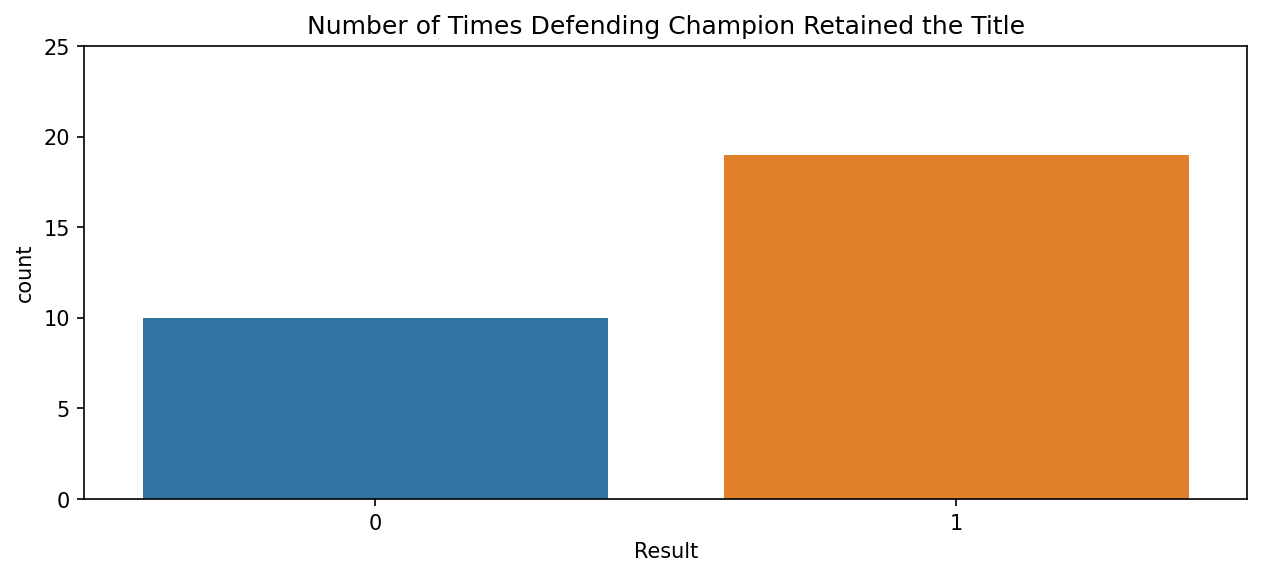

In [66]:
plt.figure(figsize=(10,4),dpi=150)
x=sns.countplot(x='Result',data=new_df)
plt.title('Number of Times Defending Champion Retained the Title')
plt.ylim(0,25)
plt.savefig('Simple_counts.png')

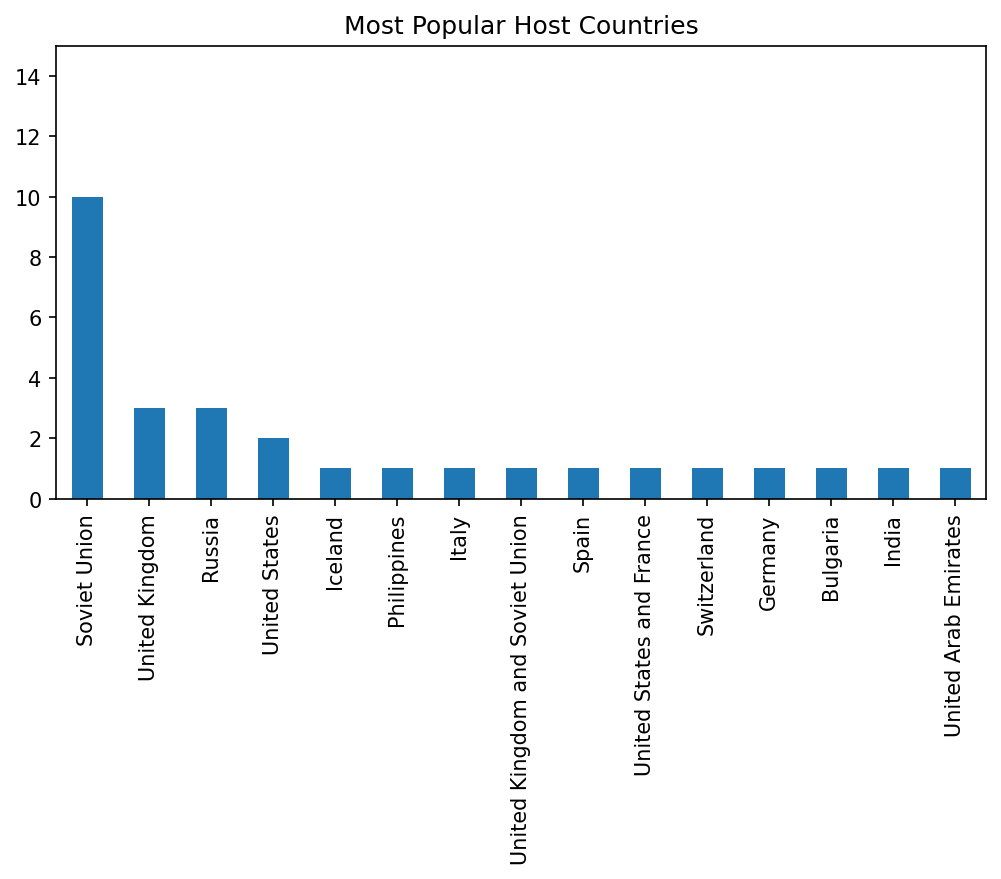

In [67]:
plt.figure(figsize=(8,4),dpi=150)
new_df['Host country'].value_counts().plot(kind="bar")
plt.title('Most Popular Host Countries')
plt.ylim(0,15)
plt.savefig('Country_counts.png')

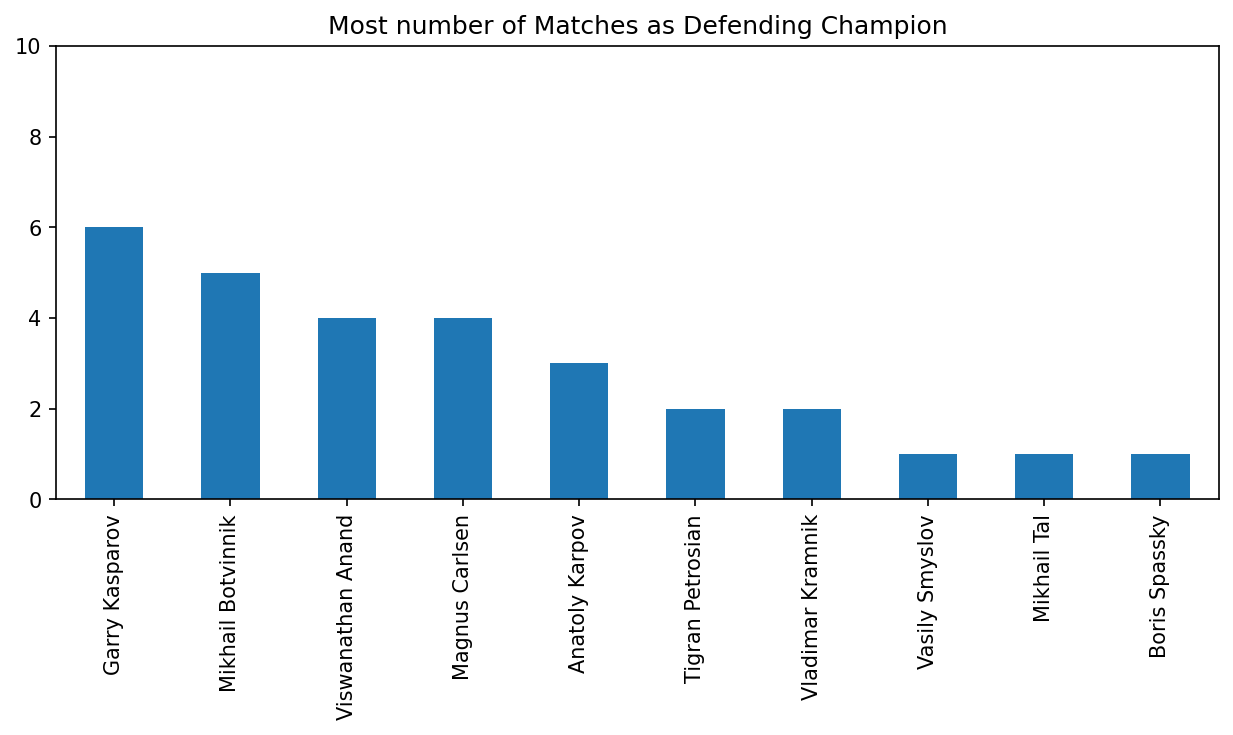

In [68]:
plt.figure(figsize=(10,4),dpi=150)
new_df['Defending Champion'].value_counts().plot(kind="bar")
plt.title('Most number of Matches as Defending Champion')
plt.ylim(0,10)
plt.savefig('DC_counts.png')


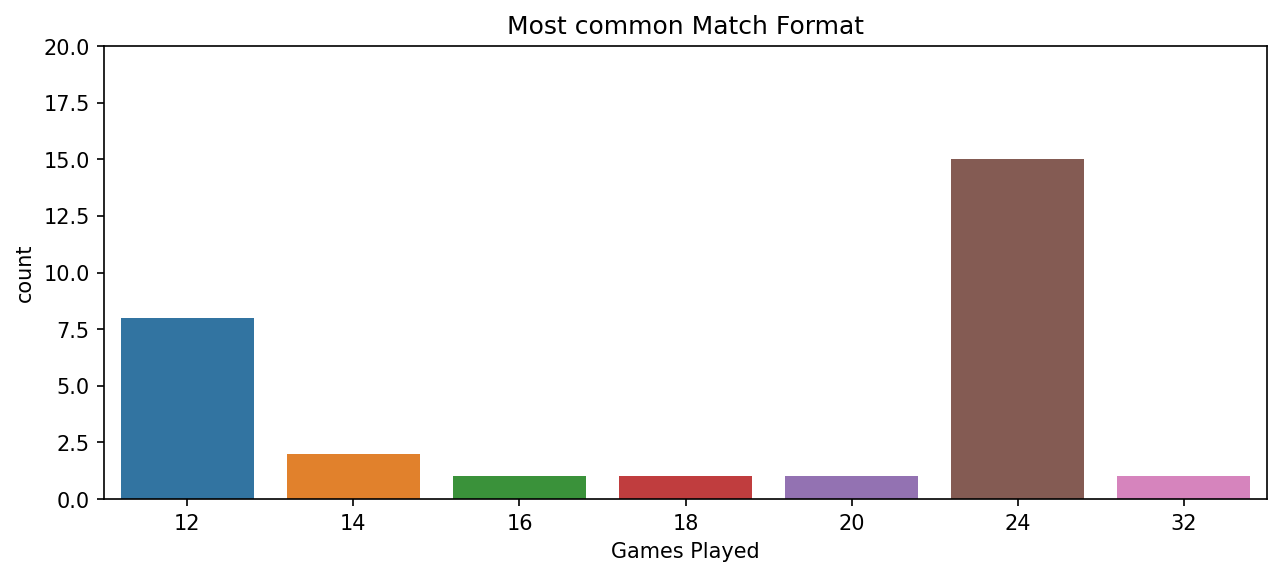

In [69]:
plt.figure(figsize=(10,4),dpi=150)
sns.countplot(x='Match Game Format',data=new_df)
plt.title('Most common Match Format')
plt.xlabel('Games Played')
plt.ylim(0,20)
plt.savefig('FOrmat_counts.png')

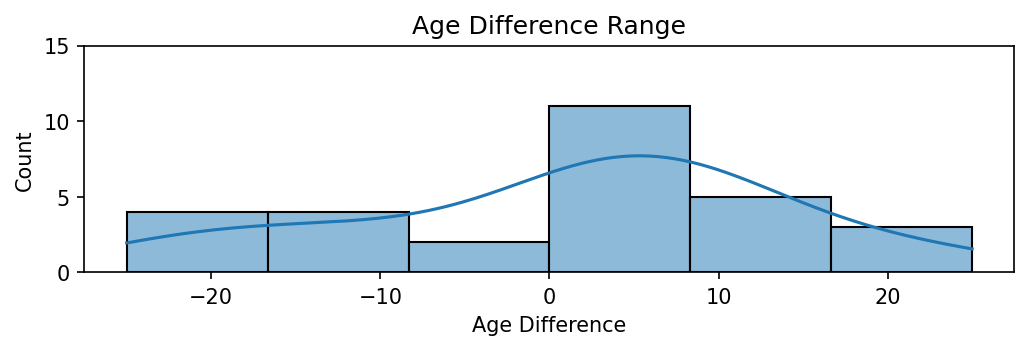

In [70]:
plt.figure(figsize=(8,2),dpi=150)
sns.histplot(data=new_df,x='Age Difference',kde=True)
plt.title('Age Difference Range')
plt.ylim(0,15)
plt.savefig('Age_diff_distr.png')

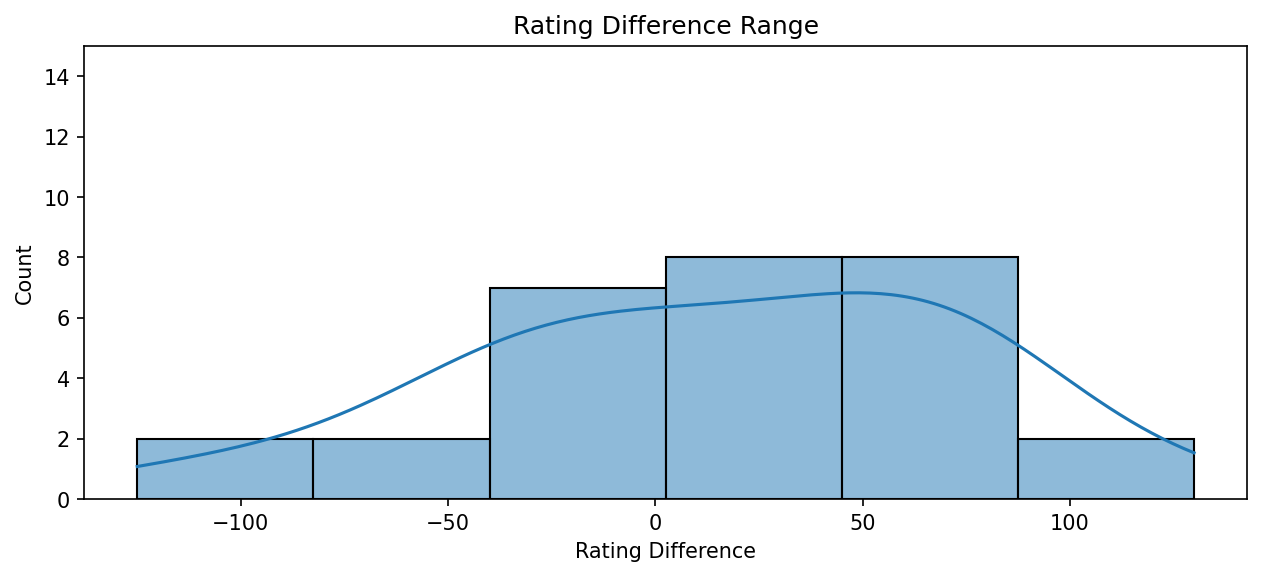

In [71]:
plt.figure(figsize=(10,4),dpi=150)
sns.histplot(data=new_df,x='Rating Difference',kde=True)
plt.title('Rating Difference Range')
plt.ylim(0,15)
plt.savefig('Rating_diff_distr.png')

In [72]:
def newer(value):
    if value>0:
        return "Champion Advantage"
    else:
        return "Challenger Advantage"

In [73]:
new_df["Advantage"]=new_df["Rating Difference"].apply(newer)
new_df['Second Advantage']=new_df['World Ranking Difference'].apply(newer)

In [74]:
new_df['Third Advantage']=new_df['Head to Head'].apply(newer)

In [75]:
new_df

,Host country,Host city,Defending Champion,Challenger,Won (+),Lost (−),Draw (=),Match Game Format,Defending Champion Age,Challenger Age,...,World Ranking Difference,Rating of Defending Champion,Rating of Challenger,Rating Difference,Head to Head,Has Challenger played WC before?,Result,Advantage,Second Advantage,Third Advantage
Year,,,,,,,,,,,,,,,,,,,,,
1951,Soviet Union,Moscow,Mikhail Botvinnik,David Bronstein,5,5,14,24,39,27,...,-6,2743,2780,-37,-1,False,1,Challenger Advantage,Challenger Advantage,Challenger Advantage
1954,Soviet Union,Moscow,Mikhail Botvinnik,Vasily Smyslov,7,7,10,24,42,33,...,-2,2779,2790,-11,6,False,1,Challenger Advantage,Challenger Advantage,Champion Advantage
1957,Soviet Union,Moscow,Mikhail Botvinnik,Vasily Smyslov,6,3,13,24,45,36,...,-3,2762,2782,-20,5,True,0,Challenger Advantage,Challenger Advantage,Champion Advantage
1958,Soviet Union,Moscow,Vasily Smyslov,Mikhail Botvinnik,7,5,11,24,37,46,...,4,2780,2747,33,2,True,0,Champion Advantage,Champion Advantage,Champion Advantage
1960,Soviet Union,Moscow,Mikhail Botvinnik,Mikhail Tal,6,2,13,24,48,23,...,-5,2736,2789,-53,0,False,0,Challenger Advantage,Challenger Advantage,Challenger Advantage
1961,Soviet Union,Moscow,Mikhail Tal,Mikhail Botvinnik,10,5,6,24,24,49,...,6,2796,2729,67,4,True,0,Champion Advantage,Champion Advantage,Champion Advantage
1963,Soviet Union,Moscow,Mikhail Botvinnik,Tigran Petrosian,5,2,15,24,51,33,...,-6,2756,2790,-34,0,False,0,Challenger Advantage,Challenger Advantage,Challenger Advantage
1966,Soviet Union,Moscow,Tigran Petrosian,Boris Spassky,4,3,17,24,36,29,...,-6,2736,2767,-31,1,False,1,Challenger Advantage,Challenger Advantage,Champion Advantage
1969,Soviet Union,Moscow,Tigran Petrosian,Boris Spassky,6,4,13,24,39,32,...,-3,2650,2690,-40,1,True,0,Challenger Advantage,Challenger Advantage,Champion Advantage


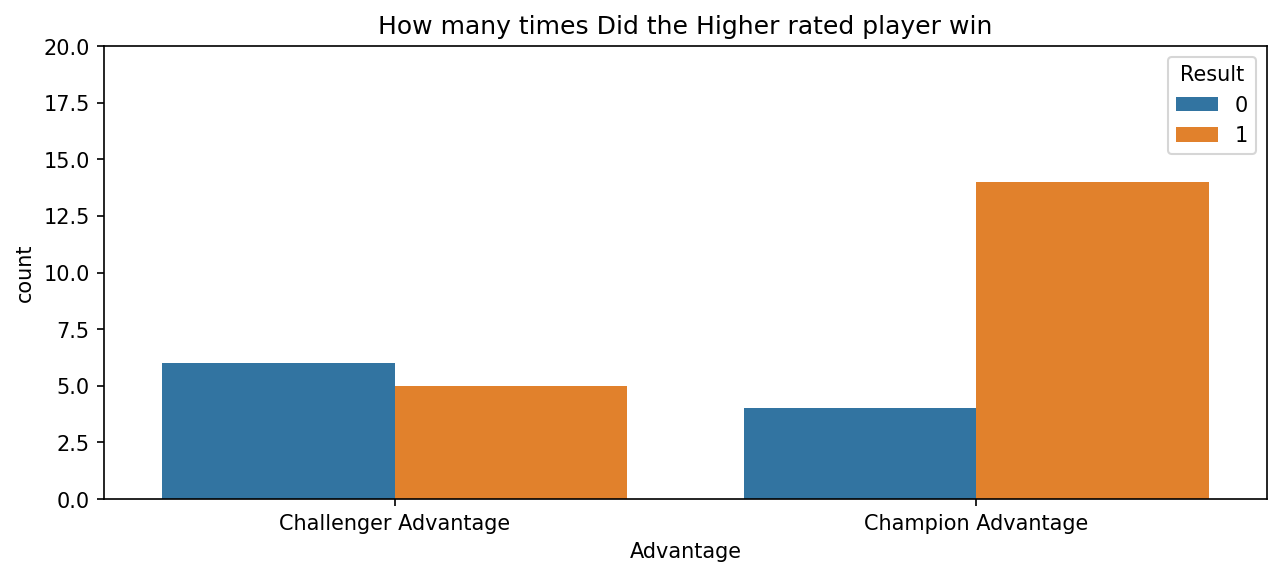

In [76]:
plt.figure(figsize=(10,4),dpi=150)
sns.countplot(x='Advantage',data=new_df,hue='Result')
plt.title('How many times Did the Higher rated player win')
plt.xlabel('Advantage')
plt.ylim(0,20)
plt.savefig('Higher_rated.png')

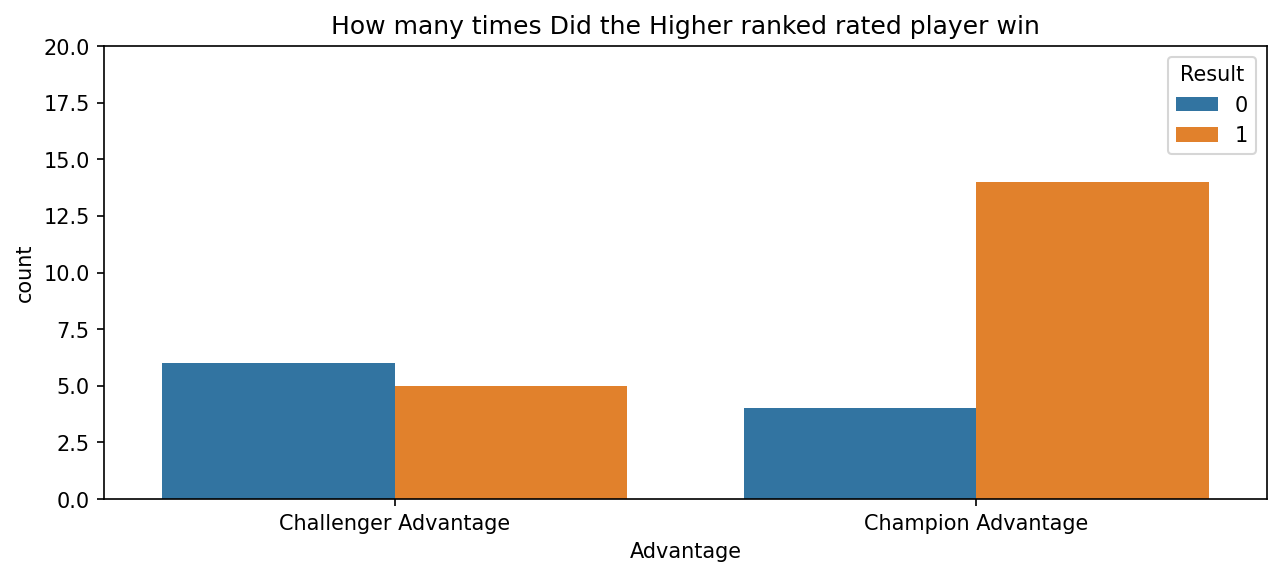

In [77]:
plt.figure(figsize=(10,4),dpi=150)
sns.countplot(x='Second Advantage',data=new_df,hue='Result')
plt.title('How many times Did the Higher ranked rated player win')
plt.xlabel('Advantage')
plt.ylim(0,20)
plt.savefig('higher_ranked.png')

In [78]:
new_df=new_df.drop('World Ranking Difference',axis=1)

(0.0, 20.0)

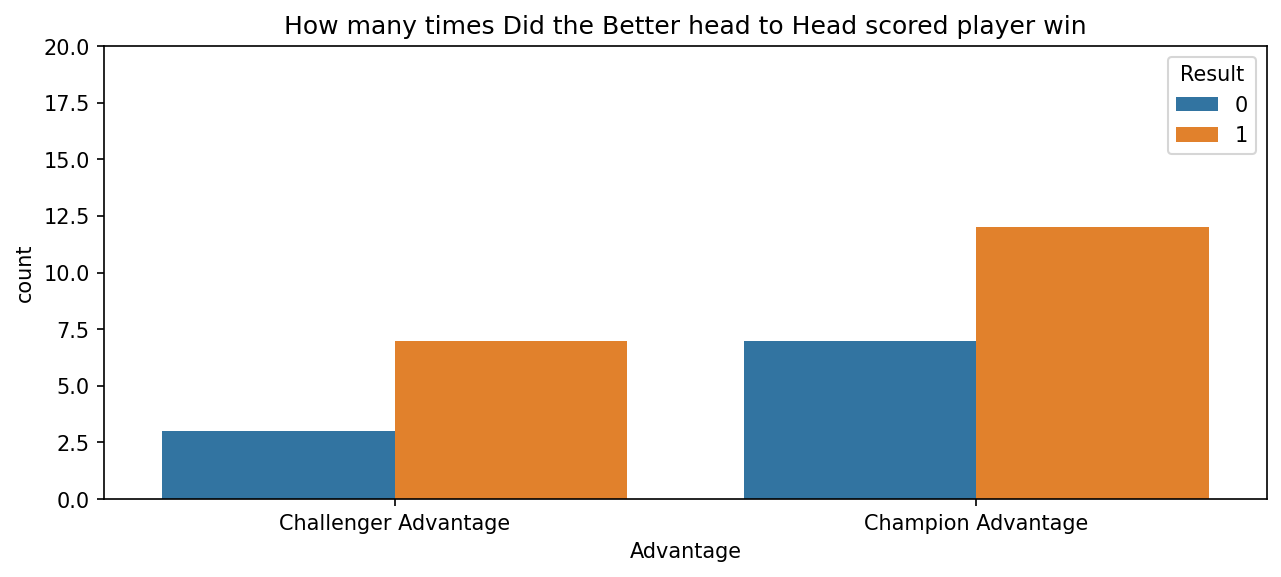

In [79]:
plt.figure(figsize=(10,4),dpi=150)
sns.countplot(x='Third Advantage',data=new_df,hue='Result')
plt.title('How many times Did the Better head to Head scored player win')
plt.xlabel('Advantage')
plt.ylim(0,20)

In [80]:
def newers(value):
    if value>0:
        return "Champion Older"
    else:
        return "Challenger Older"

In [81]:
new_df['Age category']=new_df['Age Difference'].apply(newers)

(0.0, 20.0)

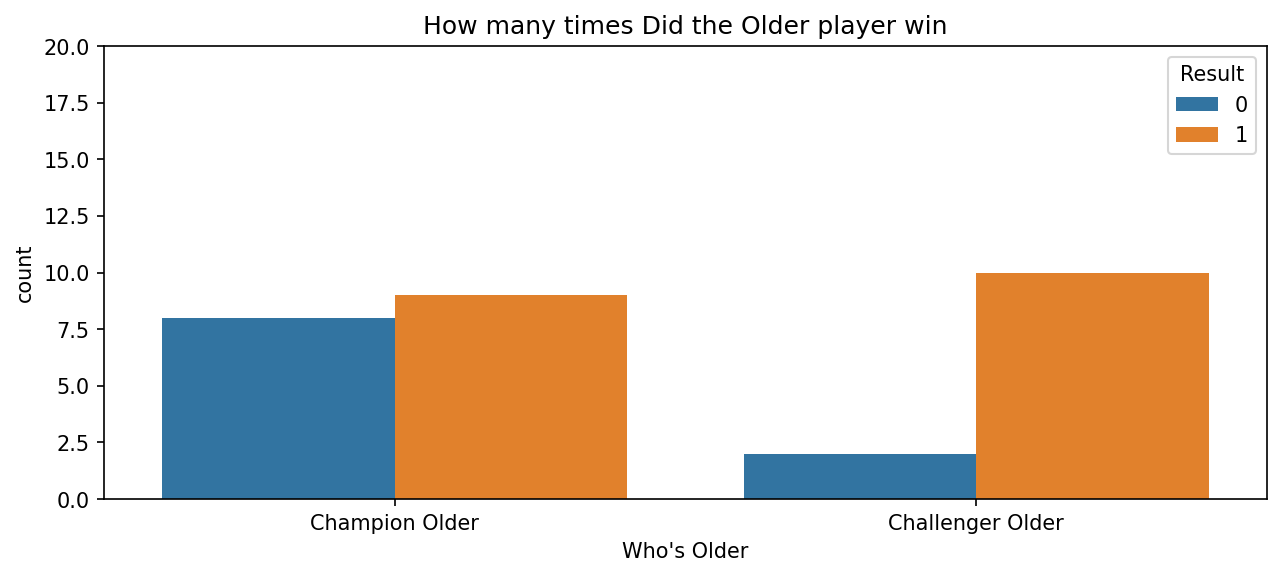

In [82]:
plt.figure(figsize=(10,4),dpi=150)
sns.countplot(x='Age category',data=new_df,hue='Result')
plt.title('How many times Did the Older player win')
plt.xlabel("Who's Older")
plt.ylim(0,20)

(0.0, 20.0)

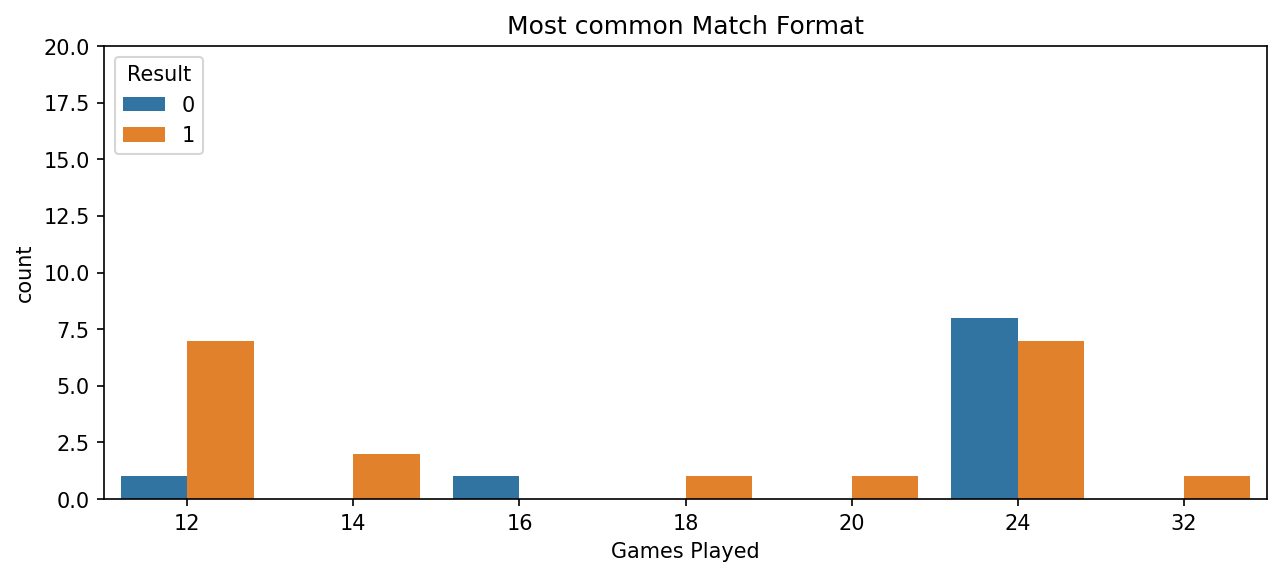

In [83]:
plt.figure(figsize=(10,4),dpi=150)
sns.countplot(x='Match Game Format',data=new_df,hue="Result")
plt.title('Most common Match Format')
plt.xlabel('Games Played')
plt.ylim(0,20)

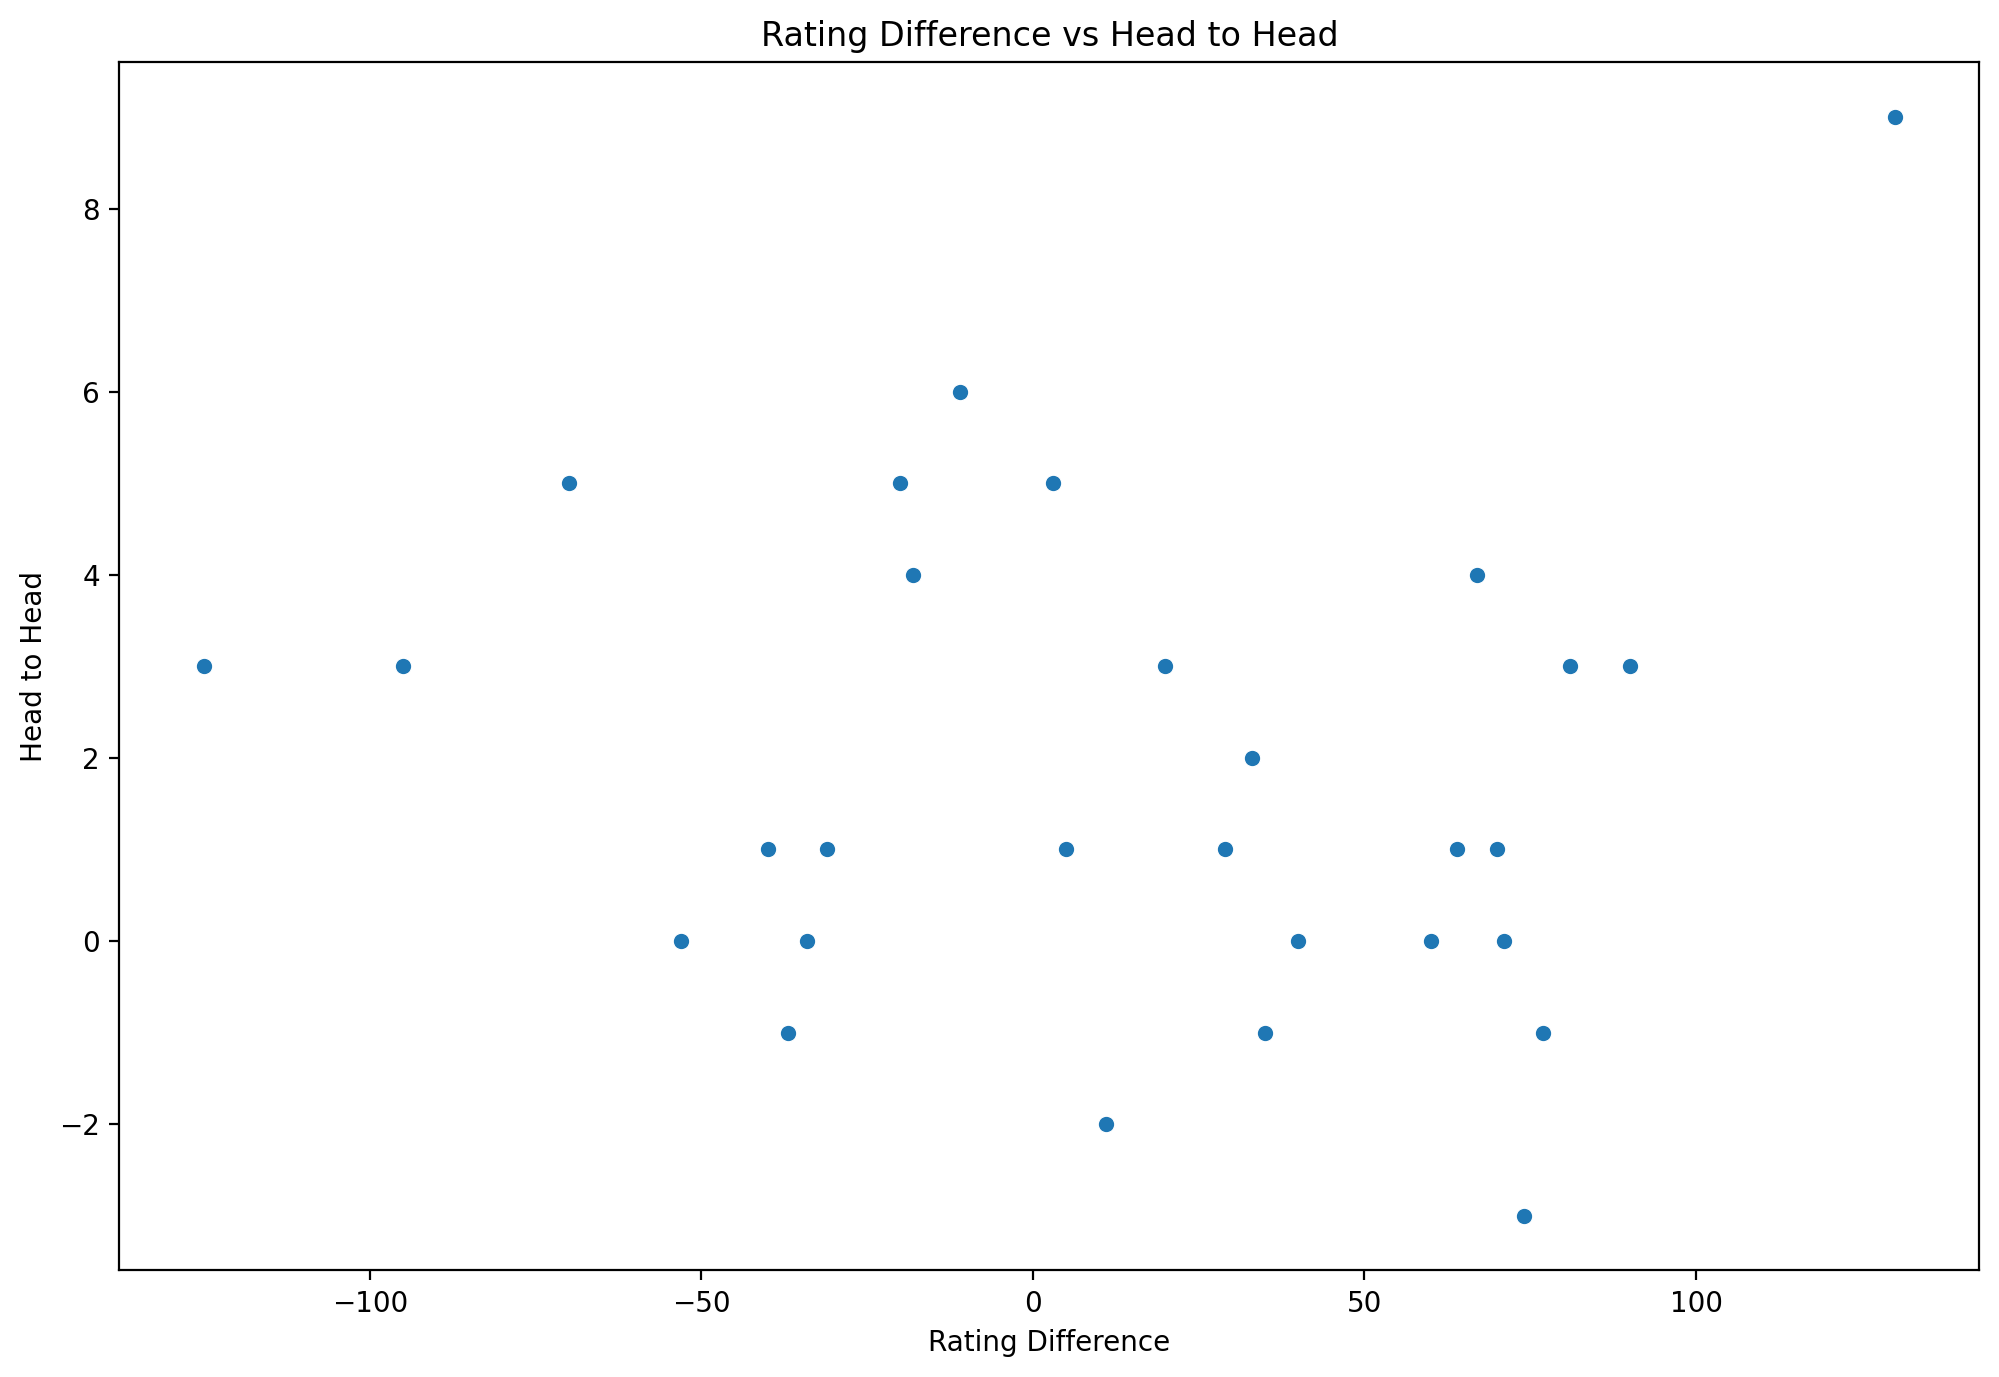

In [84]:
plt.figure(figsize=(12,8),dpi=200)
x=sns.scatterplot(x='Rating Difference',y="Head to Head",data=new_df)
plt.title('Rating Difference vs Head to Head');

(0.0, 20.0)

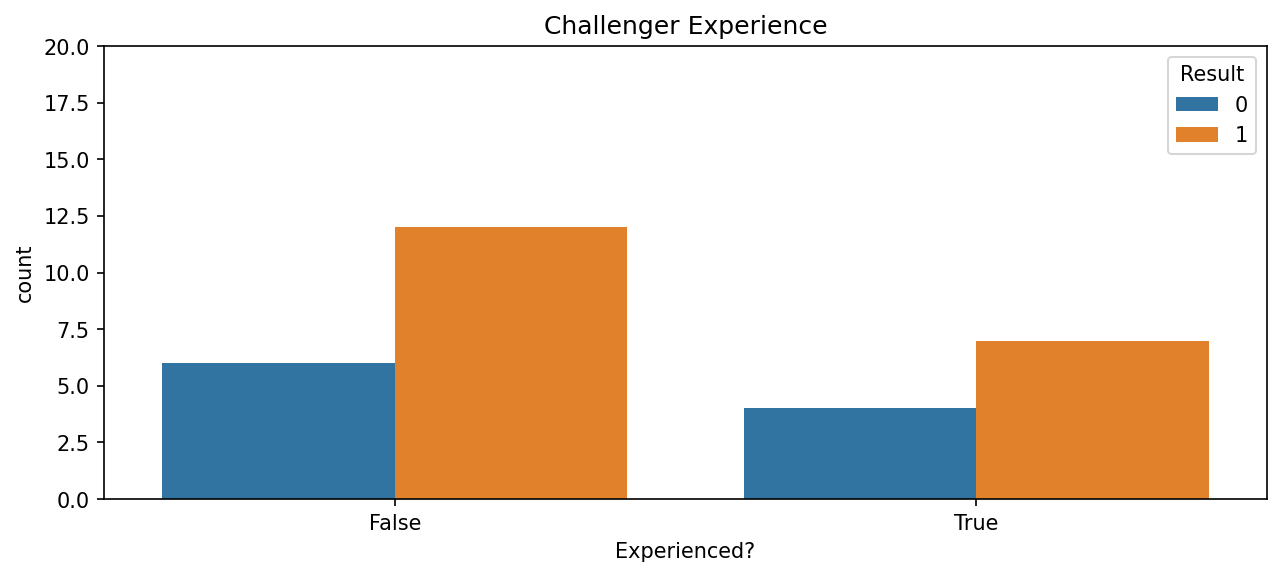

In [85]:
plt.figure(figsize=(10,4),dpi=150)
sns.countplot(x='Has Challenger played WC before?',data=new_df,hue="Result")
plt.title('Challenger Experience')
plt.xlabel('Experienced?')
plt.ylim(0,20)

In [86]:
new_df.head()

,Host country,Host city,Defending Champion,Challenger,Won (+),Lost (−),Draw (=),Match Game Format,Defending Champion Age,Challenger Age,...,Rating of Defending Champion,Rating of Challenger,Rating Difference,Head to Head,Has Challenger played WC before?,Result,Advantage,Second Advantage,Third Advantage,Age category
Year,,,,,,,,,,,,,,,,,,,,,
1951,Soviet Union,Moscow,Mikhail Botvinnik,David Bronstein,5,5,14,24,39,27,...,2743,2780,-37,-1,False,1,Challenger Advantage,Challenger Advantage,Challenger Advantage,Champion Older
1954,Soviet Union,Moscow,Mikhail Botvinnik,Vasily Smyslov,7,7,10,24,42,33,...,2779,2790,-11,6,False,1,Challenger Advantage,Challenger Advantage,Champion Advantage,Champion Older
1957,Soviet Union,Moscow,Mikhail Botvinnik,Vasily Smyslov,6,3,13,24,45,36,...,2762,2782,-20,5,True,0,Challenger Advantage,Challenger Advantage,Champion Advantage,Champion Older
1958,Soviet Union,Moscow,Vasily Smyslov,Mikhail Botvinnik,7,5,11,24,37,46,...,2780,2747,33,2,True,0,Champion Advantage,Champion Advantage,Champion Advantage,Challenger Older
1960,Soviet Union,Moscow,Mikhail Botvinnik,Mikhail Tal,6,2,13,24,48,23,...,2736,2789,-53,0,False,0,Challenger Advantage,Challenger Advantage,Challenger Advantage,Champion Older


In [87]:
new_df=new_df.drop(columns=['Host country','Host city','Won (+)', 'Lost (−)','Draw (=)'],axis=1)

In [88]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29 entries, 1951 to 2021
Data columns (total 16 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   Defending Champion                29 non-null     object
 1   Challenger                        29 non-null     object
 2   Match Game Format                 29 non-null     int64 
 3   Defending Champion Age            29 non-null     int64 
 4   Challenger Age                    29 non-null     int64 
 5   Age Difference                    29 non-null     int64 
 6   Rating of Defending Champion      29 non-null     int64 
 7   Rating of Challenger              29 non-null     int64 
 8   Rating Difference                 29 non-null     int64 
 9   Head to Head                      29 non-null     int64 
 10  Has Challenger played WC before?  29 non-null     bool  
 11  Result                            29 non-null     int64 
 12  Advantage               

In [89]:
new_df=new_df.drop(columns=['Rating of Defending Champion','Rating of Challenger','Advantage','Second Advantage','Third Advantage','Age category'],axis=1)

In [90]:
new_df.head()

,Defending Champion,Challenger,Match Game Format,Defending Champion Age,Challenger Age,Age Difference,Rating Difference,Head to Head,Has Challenger played WC before?,Result
Year,,,,,,,,,,
1951,Mikhail Botvinnik,David Bronstein,24,39,27,12,-37,-1,False,1
1954,Mikhail Botvinnik,Vasily Smyslov,24,42,33,9,-11,6,False,1
1957,Mikhail Botvinnik,Vasily Smyslov,24,45,36,9,-20,5,True,0
1958,Vasily Smyslov,Mikhail Botvinnik,24,37,46,-9,33,2,True,0
1960,Mikhail Botvinnik,Mikhail Tal,24,48,23,25,-53,0,False,0


In [91]:
final_df=new_df.drop(columns=['Defending Champion','Challenger'])

In [94]:
pd.get_dummies(final_df.drop('Result',axis=1),drop_first=True)

,Match Game Format,Defending Champion Age,Challenger Age,Age Difference,Rating Difference,Head to Head,Has Challenger played WC before?
Year,,,,,,,
1951,24,39,27,12,-37,-1,False
1954,24,42,33,9,-11,6,False
1957,24,45,36,9,-20,5,True
1958,24,37,46,-9,33,2,True
1960,24,48,23,25,-53,0,False
1961,24,24,49,-25,67,4,True
1963,24,51,33,18,-34,0,False
1966,24,36,29,7,-31,1,False
1969,24,39,32,7,-40,1,True


In [95]:
X=pd.get_dummies(final_df.drop('Result',axis=1),drop_first=True)
y=final_df['Result']

In [96]:
from sklearn.model_selection import train_test_split

In [97]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [98]:
from sklearn.tree import DecisionTreeClassifier

In [99]:
model = DecisionTreeClassifier()

In [100]:
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [101]:
base_pred = model.predict(X_test)

In [102]:
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix

In [103]:
confusion_matrix(y_test,base_pred)

array([[0, 2],
       [1, 6]])

/Users/pranavks/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


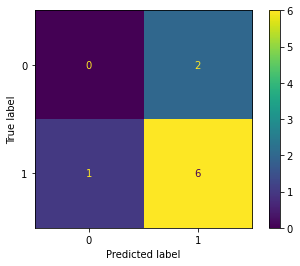

In [104]:
plot_confusion_matrix(model,X_test,y_test)

In [105]:
print(classification_report(y_test,base_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.75      0.86      0.80         7

    accuracy                           0.67         9
   macro avg       0.38      0.43      0.40         9
weighted avg       0.58      0.67      0.62         9



In [107]:
pd.DataFrame(index=X.columns,data=model.feature_importances_,columns=['Feature Importance'])

,Feature Importance
Match Game Format,0.206229
Defending Champion Age,0.284512
Challenger Age,0.000000
Age Difference,0.185185
Rating Difference,0.104167
Head to Head,0.219907
Has Challenger played WC before?,0.000000


In [108]:
from joblib import dump, load

In [110]:
dump(model, 'chess_predictor_first.joblib') 

['chess_predictor_first.joblib']

In [111]:
new_df.head()

,Defending Champion,Challenger,Match Game Format,Defending Champion Age,Challenger Age,Age Difference,Rating Difference,Head to Head,Has Challenger played WC before?,Result
Year,,,,,,,,,,
1951,Mikhail Botvinnik,David Bronstein,24,39,27,12,-37,-1,False,1
1954,Mikhail Botvinnik,Vasily Smyslov,24,42,33,9,-11,6,False,1
1957,Mikhail Botvinnik,Vasily Smyslov,24,45,36,9,-20,5,True,0
1958,Vasily Smyslov,Mikhail Botvinnik,24,37,46,-9,33,2,True,0
1960,Mikhail Botvinnik,Mikhail Tal,24,48,23,25,-53,0,False,0


In [112]:
pd.get_dummies(new_df.drop('Result',axis=1),drop_first=True)

,Match Game Format,Defending Champion Age,Challenger Age,Age Difference,Rating Difference,Head to Head,Has Challenger played WC before?,Defending Champion_Boris Spassky,Defending Champion_Garry Kasparov,Defending Champion_Magnus Carlsen,...,Challenger_Mikhail Tal,Challenger_Nigel Short,Challenger_Peter Leko,Challenger_Sergey Karjakin,Challenger_Tigran Petrosian,Challenger_Vasily Smyslov,Challenger_Veselin Topalov,Challenger_Viktor Korchnoi,Challenger_Viswanathan Anand,Challenger_Vladimar Kramnik
Year,,,,,,,,,,,,,,,,,,,,,
1951,24,39,27,12,-37,-1,False,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1954,24,42,33,9,-11,6,False,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1957,24,45,36,9,-20,5,True,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1958,24,37,46,-9,33,2,True,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1960,24,48,23,25,-53,0,False,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1961,24,24,49,-25,67,4,True,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1963,24,51,33,18,-34,0,False,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1966,24,36,29,7,-31,1,False,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1969,24,39,32,7,-40,1,True,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [116]:
X=pd.get_dummies(new_df.drop('Result',axis=1),drop_first=True)
y=new_df['Result']

In [117]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [118]:
second_model = DecisionTreeClassifier()

In [119]:
second_model.fit(X_train,y_train)

DecisionTreeClassifier()

In [120]:
second_base_pred = second_model.predict(X_test)

In [121]:
confusion_matrix(y_test,second_base_pred)

array([[0, 2],
       [1, 6]])

/Users/pranavks/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


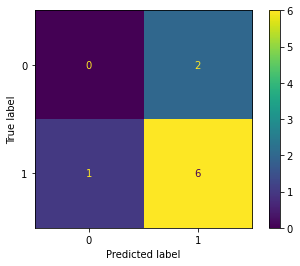

In [122]:
plot_confusion_matrix(second_model,X_test,y_test)

In [123]:
print(classification_report(y_test,second_base_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.75      0.86      0.80         7

    accuracy                           0.67         9
   macro avg       0.38      0.43      0.40         9
weighted avg       0.58      0.67      0.62         9



In [124]:
pd.DataFrame(index=X.columns,data=second_model.feature_importances_,columns=['Feature Importance'])

,Feature Importance
Match Game Format,0.206229
Defending Champion Age,0.284512
Challenger Age,0.000000
Age Difference,0.000000
Rating Difference,0.000000
Head to Head,0.141782
Has Challenger played WC before?,0.000000
Defending Champion_Boris Spassky,0.000000
Defending Champion_Garry Kasparov,0.000000
Defending Champion_Magnus Carlsen,0.000000


In [125]:
dump(second_model, 'chess_predictor_second.joblib')

['chess_predictor_second.joblib']